In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'UP'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

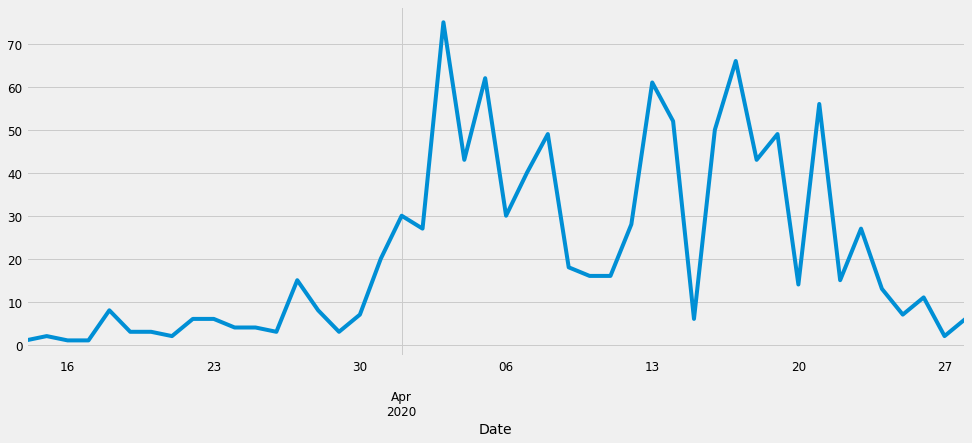

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

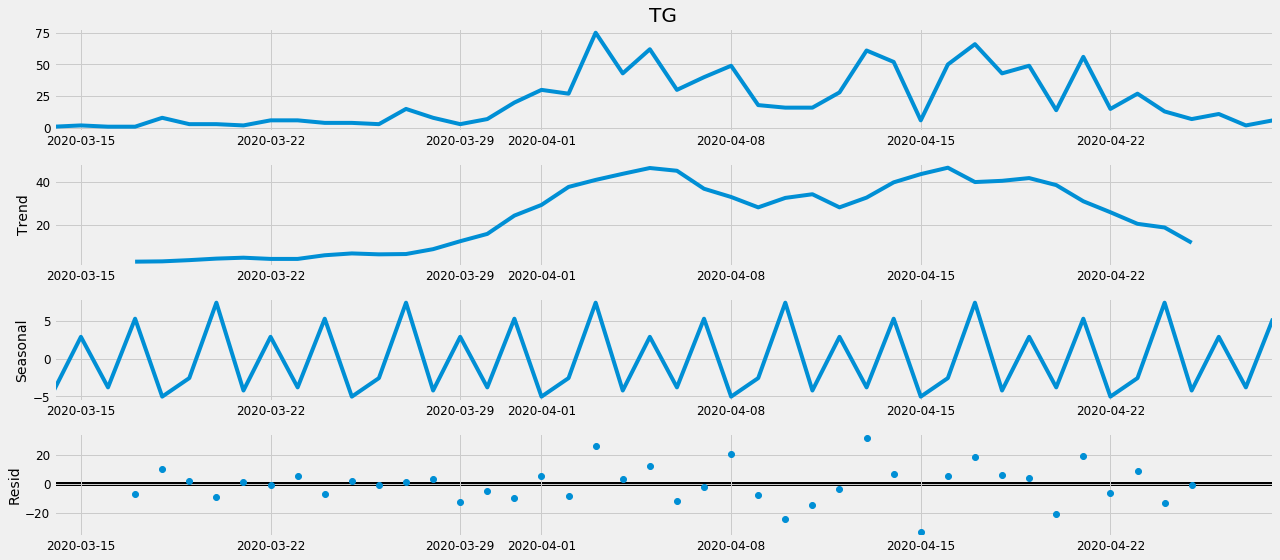

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:438.1419809826575


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1174.3869249186919
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:321.7570303575148
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:201.45251337154224
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:329.24280171386476


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1346.974221345428
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:214.00016189346613
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:204.91174970947586
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:411.6322203871943


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1319.8402964949987
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:311.1743655835519
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:191.6903077966266
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:324.4914764016625


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1318.815328612122
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:214.27147751977662
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:195.69961369927546
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:391.0228045700934


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1567.9551684884634
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:316.91288812185286
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:196.70654646930572
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:303.7428499867161


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1573.784943378813
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:205.559736498605
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:198.90413804902514
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:371.59190771462494
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3027.9582981998387
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:297.22064163165777
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:182.02087233962166
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:296.6601454396596
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1510.1260343427
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:201.79714001742533
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:185.7420346407474
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:395.9089794233397


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1495.3108497126443
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:317.4839595853443
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:199.3849161962816
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:302.9921046639345


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1494.2545208535835
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:202.44553766030154
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:204.17236900235562
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:380.5828337675402


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1540.5344518300299
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:306.7915174770578
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:190.43444076410594
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:298.02706086732354
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1539.5703356137055
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:202.373257168166
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:195.00320333933408
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:381.02503128573164


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1260.77887704241
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:309.5736022075902
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:193.76532042739308
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:289.1037042285268


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1417.3648778473887
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:194.29796082822673
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:196.26688292449901
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:373.20580281756594
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1412.227344084788
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:299.06034946958624
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:183.88622382616518
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:290.0005366981561
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1489.8538936965736
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:195.10445693598632
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:187.64399286432143


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1147      0.493     -0.233      0.816      -1.081       0.852
ma.L1         -0.5552      0.470     -1.181      0.238      -1.477       0.366
ma.S.L12      -1.0001   5941.686     -0.000      1.000   -1.16e+04    1.16e+04
sigma2       429.2862   2.55e+06      0.000      1.000      -5e+06       5e+06


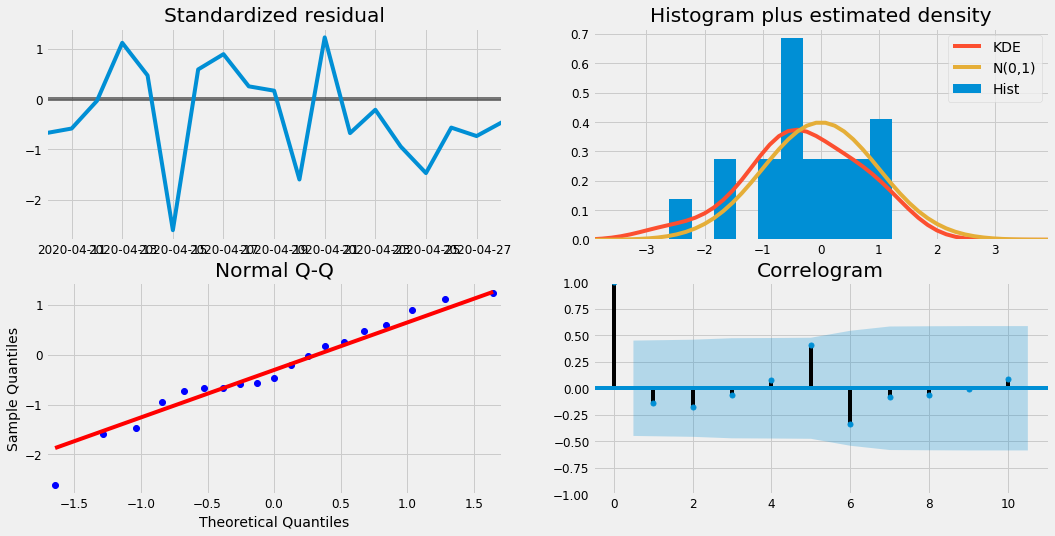

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

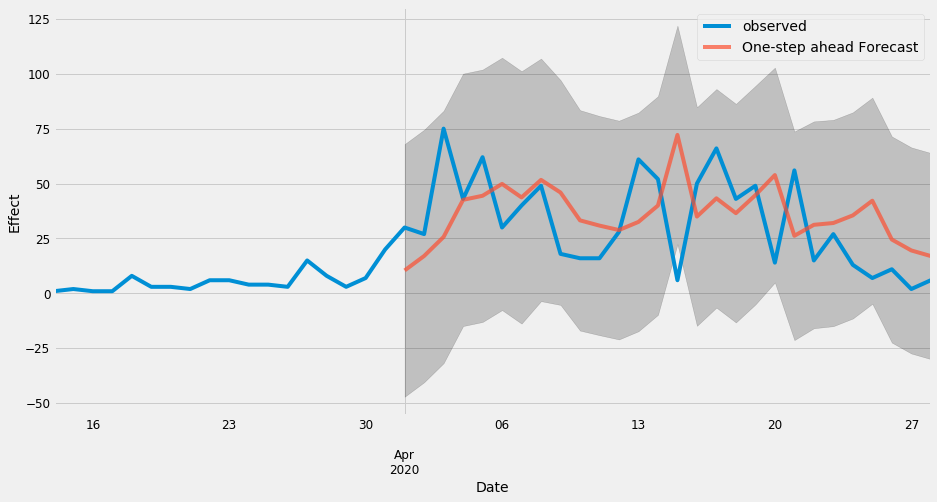

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [12]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 578.05


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 24.04


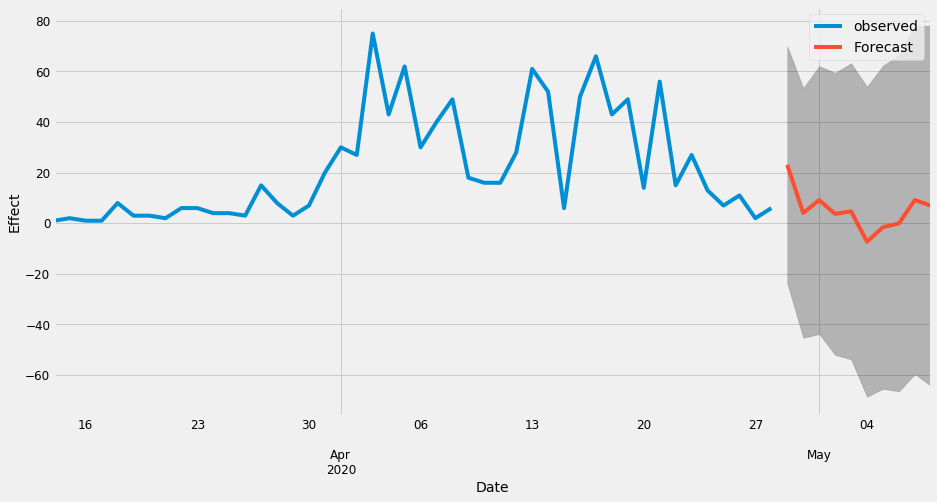

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,13,39
2020-04-25,7,16
2020-04-26,11,9
2020-04-27,2,16
2020-04-28,6,42


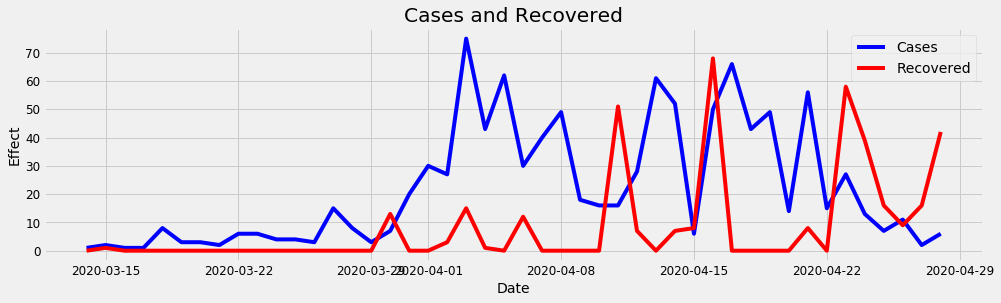

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

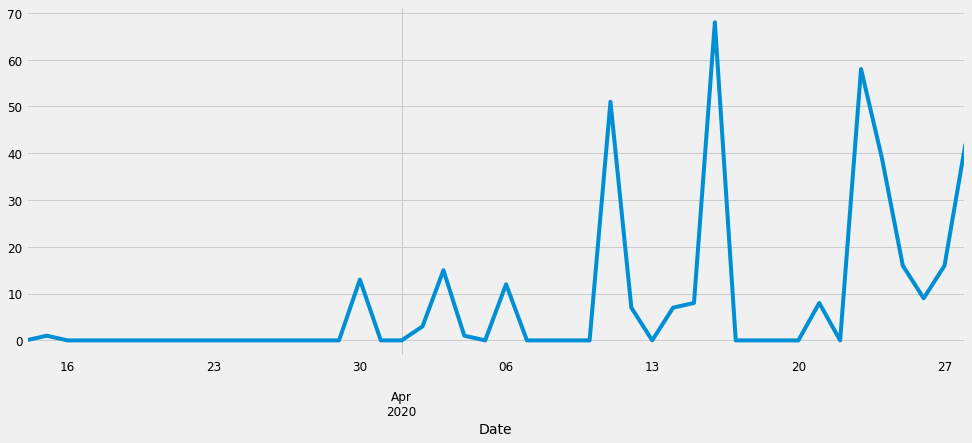

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

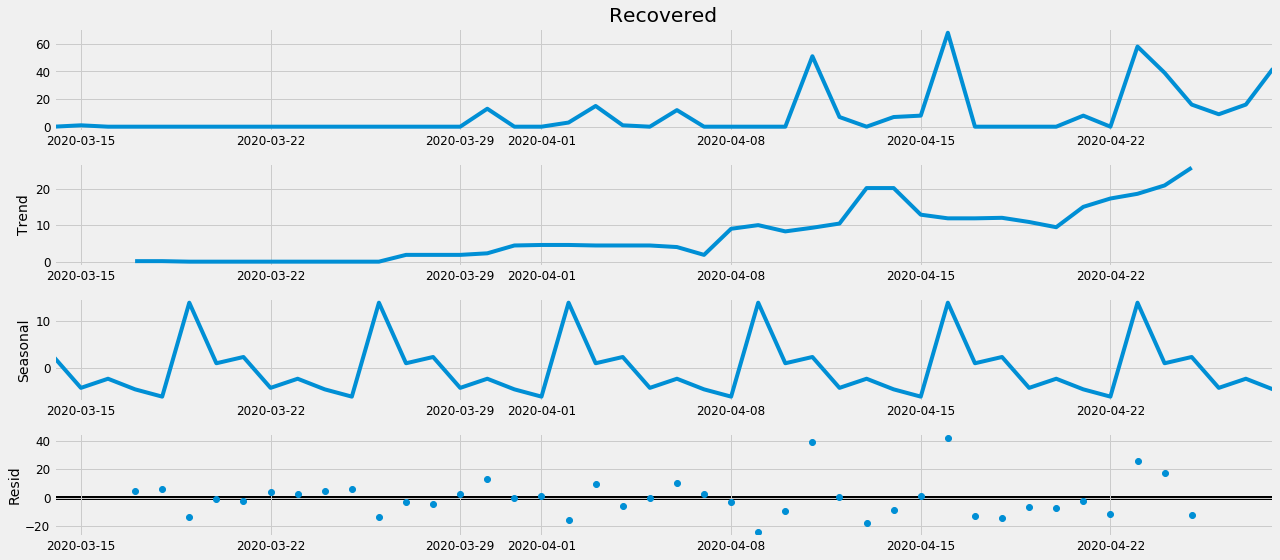

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:391.83610847963973
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1460.7078152436093
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:280.27541872220445
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:188.88784880602756
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:289.3935267042563


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1391.6351436044406
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:196.64783866040582
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:188.60431803468308
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:382.01537594026325


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1414.3397743139676
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:274.747454608975
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:182.81716859817823
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:291.086557244737


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1389.1073759340393
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:198.38125846883966
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:184.4104172684382
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:393.84258087719417


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1604.268380827326
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:292.20911873704813
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:191.6295210276867
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:299.8610084205113


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1219.8131955157937
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:200.02924228187283
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:192.81421159709214
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:366.2962608498475


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1145.307137650314
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:265.95603948446006
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:172.4758789753032
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:281.6862331667666


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:981.3023100965951
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:189.6683761632858
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:174.94074663915512
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:388.3325928483182


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1302.8726646242023
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:282.2009831232379
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:190.62577082549672
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:283.6704892492032


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1276.373305411374
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:190.59278647292825
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:192.2048498401692
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:373.49759545963195
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2890.6024980721213
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:275.44043339209975
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:183.6694403204382
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:283.5242184659496


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1264.6526310623772
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:191.40656516667514
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:185.35473157265008
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:388.437600835283


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1322.610522004415
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:287.09997508871646
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:189.54292865391932
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:287.05339783187736


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1033.1879126011322
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:189.5605847956546
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:190.84329174703387
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:368.29010340086717


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1185.7996385622926
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:267.6484841222026
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:174.42148520328251
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:275.72345437042304


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:673.7059258537249
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:183.36131714652797
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:176.4214838081306


In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0544      0.558     -0.098      0.922      -1.147       1.038
ma.L1         -1.0000   4797.853     -0.000      1.000   -9404.620    9402.620
ma.S.L12      -0.3427      0.402     -0.853      0.393      -1.130       0.444
sigma2       346.4603   1.66e+06      0.000      1.000   -3.26e+06    3.26e+06


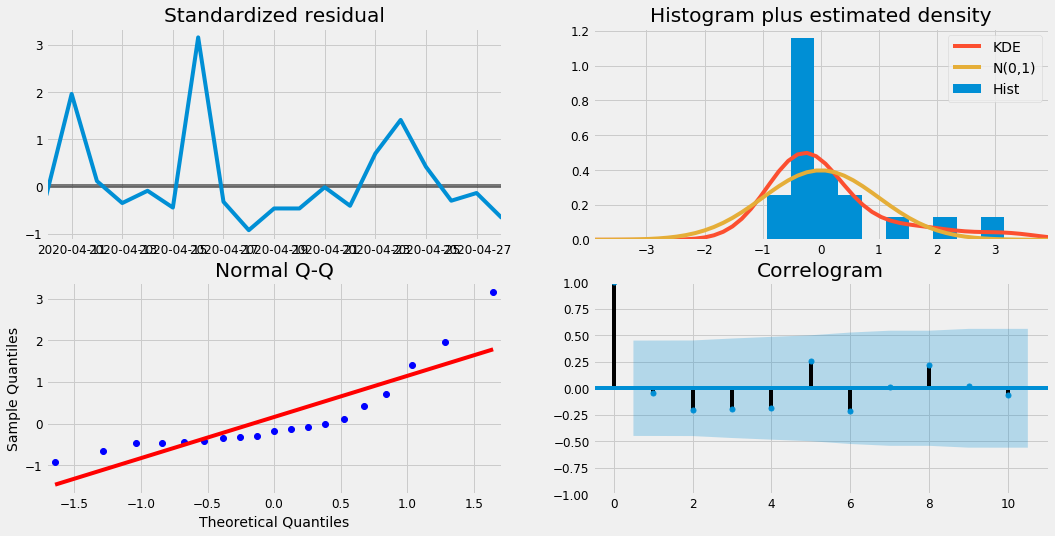

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

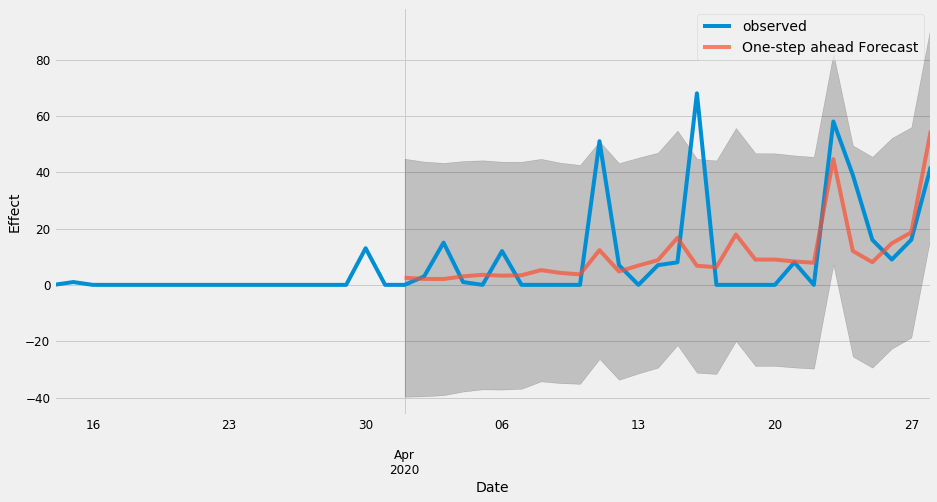

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 266.63


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 16.33


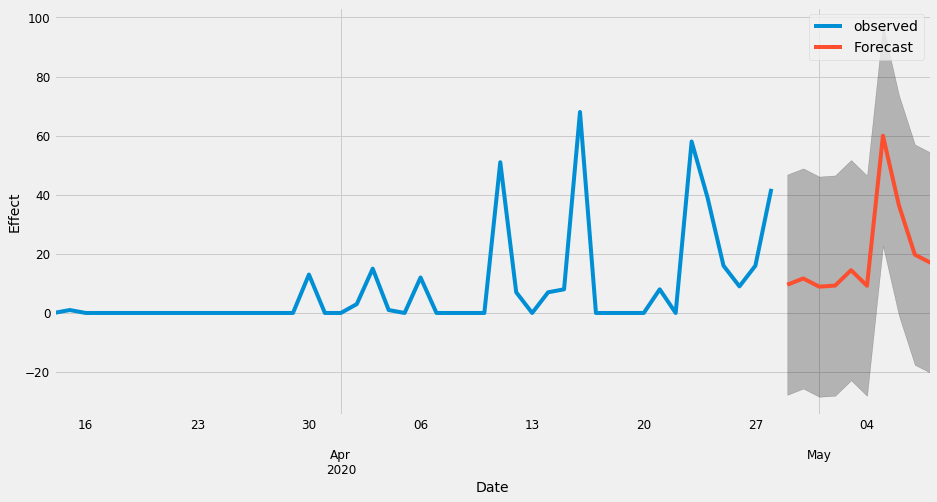

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

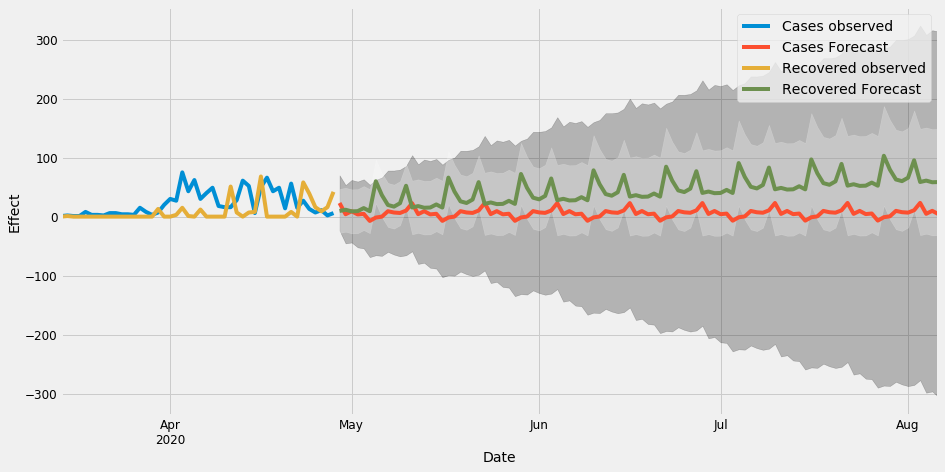

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-04


In [32]:
int(np.mean(cases_result_date)[0])

6

In [33]:
int(min(cases_result_date[0]))

-7

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-04


In [35]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [36]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-04-29


In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-05


In [38]:
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 9, 6

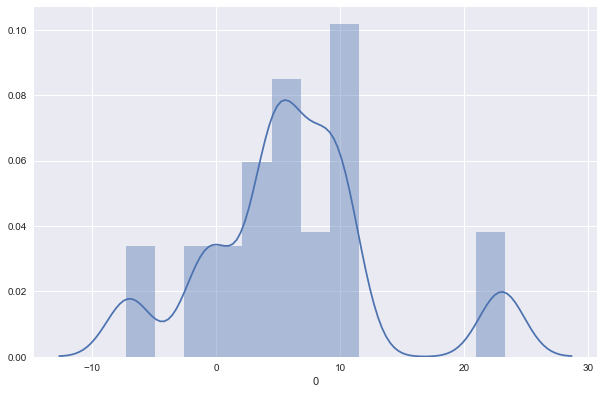

In [39]:
sns.distplot(cases_result_date[0])
plt.show(block=True)

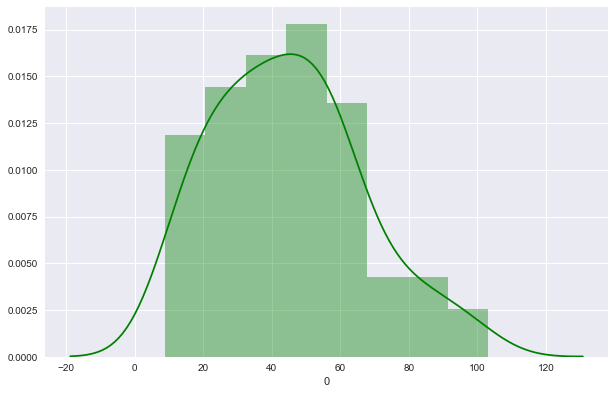

In [40]:
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

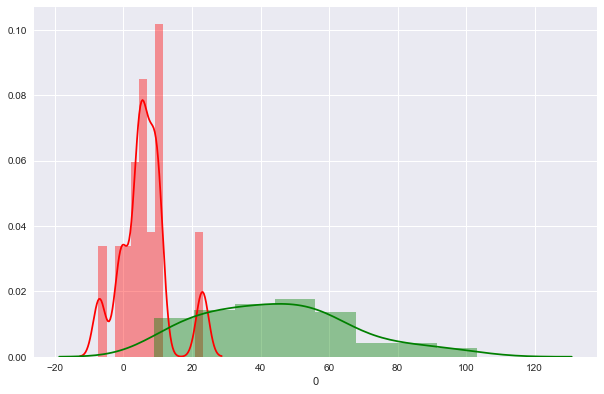

In [41]:
sns.distplot(cases_result_date[0],color='red')
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

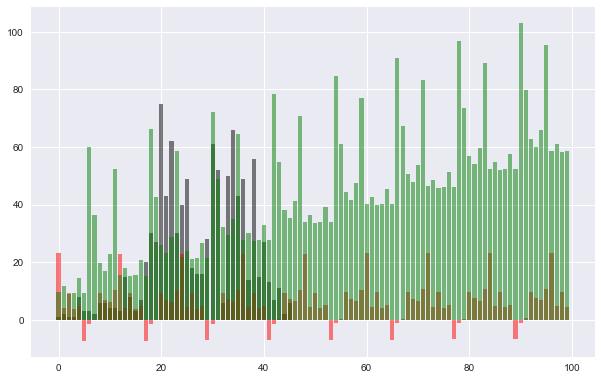

In [42]:
plt.bar([i for i in range(len(total_data['Cases']))], total_data['Cases'], align='center', alpha=0.5, color = 'black')
plt.bar([i for i in range(len(total_data['Recovered']))], total_data['Recovered'][0], align='center', alpha=0.5, color = 'blue')
plt.bar([i for i in range(len(cases_result_date))], cases_result_date[0], align='center', alpha=0.5, color = 'red')
plt.bar([i for i in range(len(recovered_result_date))], recovered_result_date[0], align='center', alpha=0.5, color='green')
plt.show()